In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# Check the number of samples and size of images
print(x_train.shape)    # 60,000 samples of image size (28 x 28) in train set
print(x_test.shape)     # 10,000 samples of image size (28 x 28) in test set

(60000, 28, 28)
(10000, 28, 28)


In [7]:
num_classes = 10    # from 0 to 9
img_rows, img_cols = 28, 28

In [8]:
# Reshape the image from (28 x 28) to (28 x 28 x 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [9]:
print(x_train[0].shape)
print(x_test[0].shape)

(28, 28, 1)
(28, 28, 1)


In [10]:
# Normalization the values to make them between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [11]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
print(y_train[0])
print(y_train_one_hot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
# Initialize model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())    # reshape 3D data into 1D data
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [15]:
# Set optimizer, learning rate, loss function, and evaluation metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Fit the model
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 23s 59ms/step - loss: 0.2909 - accuracy: 0.9127 - val_loss: 0.1276 - val_accuracy: 0.9631
Epoch 2/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0880 - accuracy: 0.9740 - val_loss: 0.0735 - val_accuracy: 0.9778
Epoch 3/10
375/375 [==============================] - 21s 57ms/step - loss: 0.0569 - accuracy: 0.9834 - val_loss: 0.0611 - val_accuracy: 0.9827
Epoch 4/10
375/375 [==============================] - 21s 56ms/step - loss: 0.0401 - accuracy: 0.9880 - val_loss: 0.0592 - val_accuracy: 0.9831
Epoch 5/10
375/375 [==============================] - 20s 54ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0515 - val_accuracy: 0.9850
Epoch 6/10
375/375 [==============================] - 21s 56ms/step - loss: 0.0223 - accuracy: 0.9936 - val_loss: 0.0569 - val_accuracy: 0.9841
Epoch 7/10
375/375 [==============================] - 22s 58ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0548 - val_accuracy:

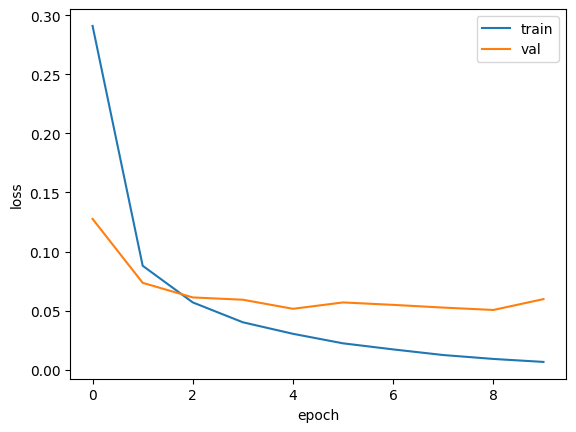

In [18]:
# Visualize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

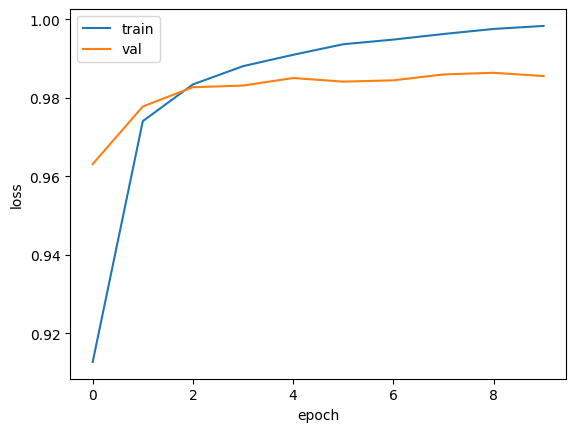

In [19]:
# Visualize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.0480 - accuracy: 0.9865
Test Accuracy: 0.9865000247955322


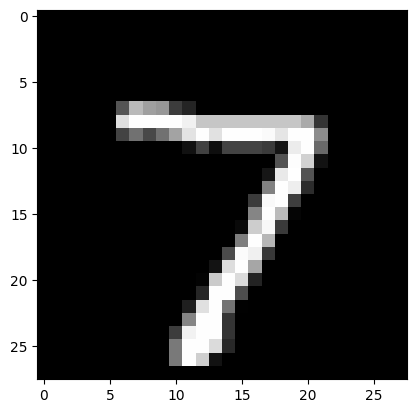

7


In [21]:
# Check true value of first one in test dataset
plt.imshow(x_test[0], cmap='gray')
plt.show()
print(y_test[0])

In [22]:
# Check predicted value of first one in test dataset
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1])
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(labels[np.argmax(prediction)])

1/1 [==============================] - 0s 93ms/step
7
